In [1]:
# Custos de reparo de equipamentos computacionais por ano (em mil reais)
dados = c(2.6, 7.5, 3.1, 4.6, 1.5, 4.5, 3.4, 4.7, 1.3, 6.2, 2.3, 5.3, 1.9, 5.8, 9.3)
length(dados)

[1] 15

In [2]:
cat("Estatísticas descritivas \n")
cat("Média:", mean(dados), "\n")
cat("Mediana:", median(dados), "\n")
cat("Desvio padrão:", sd(dados), "\n")
cat("Variância:", var(dados), "\n")
cat("Máximo:", max(dados), "\n")
cat("Mínimo:", min(dados), "\n")

Estatísticas descritivas 
Média: 4.266667 
Mediana: 4.5 
Desvio padrão: 2.300828 
Variância: 5.29381 
Máximo: 9.3 
Mínimo: 1.3 


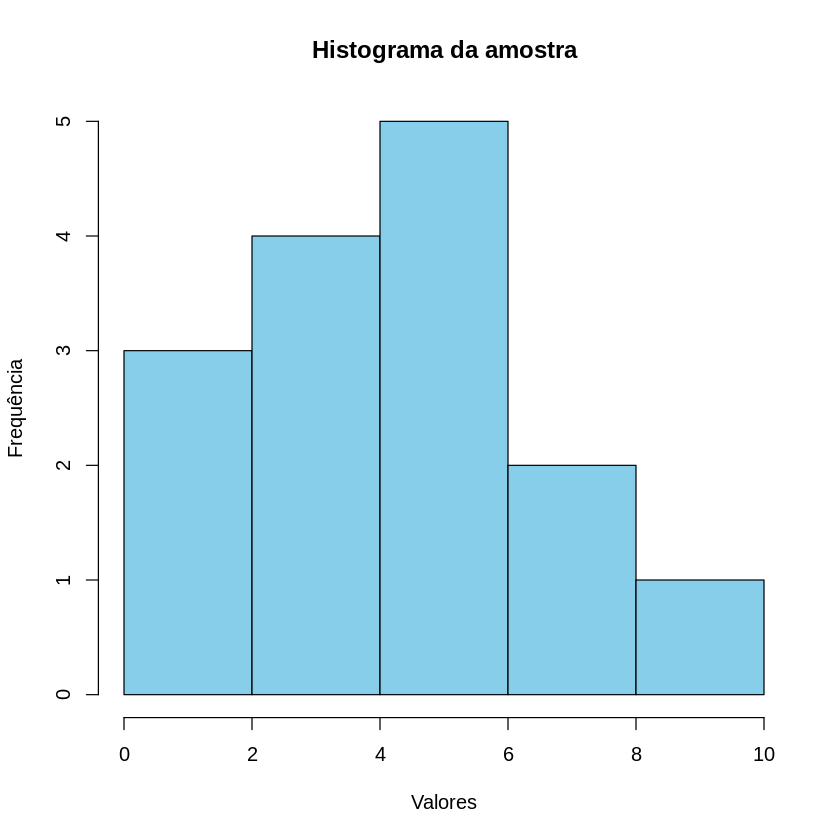

In [3]:
##### Histograma dos dados empiricos
hist(dados, col = "skyblue",
     border = "black",
     main = "Histograma da amostra",
     xlab = "Valores",
     ylab = "Frequência")

# Gamma

In [ ]:
### Log-verossimilhança Gamma

fverossimGamma = function(alfa, lambda, dados){

  n = length(dados)
  n*log((lambda**alfa)/gamma(alfa)) - lambda*sum(dados) + (alfa -1)*sum(log(dados))

}

In [ ]:
# GERANDO OS PONTOS (MESHGRID) PARA PLOTAR O GRÁFICO 3D

alfa_grid = seq(0.1, 10, by = 0.1)
lambda_grid = seq(0.1, 10, by = 0.1)

logVerMatrix = matrix(NA, nrow = length(alfa_grid), ncol = length(lambda_grid))

for (i in seq_along(alfa_grid)) {
  for (j in seq_along(lambda_grid)) {
    logVerMatrix[i, j] <- fverossimGamma(alfa_grid[i], lambda_grid[j], dados)
  }
}

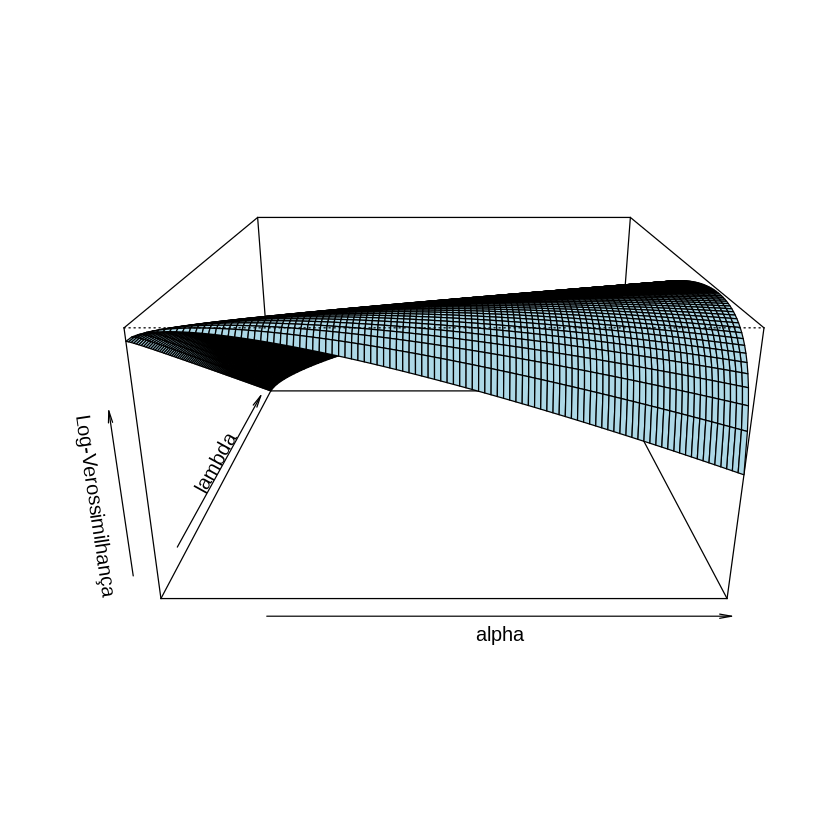

In [ ]:
#### GRÁFICO DA FUNÇÃO DE VEROSSIMILHANÇA
persp(alfa_grid, lambda_grid, logVerMatrix,
      theta = 0 , phi = 20, expand = 0.5,
      col = "lightblue", xlab = "alpha", ylab = "lambda", zlab = "Log-Verossimilhança")

In [ ]:
# Método da Máxima verossimilhança

# Função da equação para alfa
alfa_eq <- function(alfa) {
  log((15*alfa)/sum(dados)) - digamma(alfa) + sum(log(dados))/15
}

# Resolver numericamente
alfa_hat <- uniroot(alfa_eq, c(0.01, 10))$root

# Estimar beta
lambda_hat <- alfa_hat / x_bar

cat("Estimativa de alpha:", alfa_hat, "\n")
cat("Estimativa de lambda :", lambda_hat, "\n")


Estimativa de alpha: 3.511404 
Estimativa de lambda : 0.8229853 


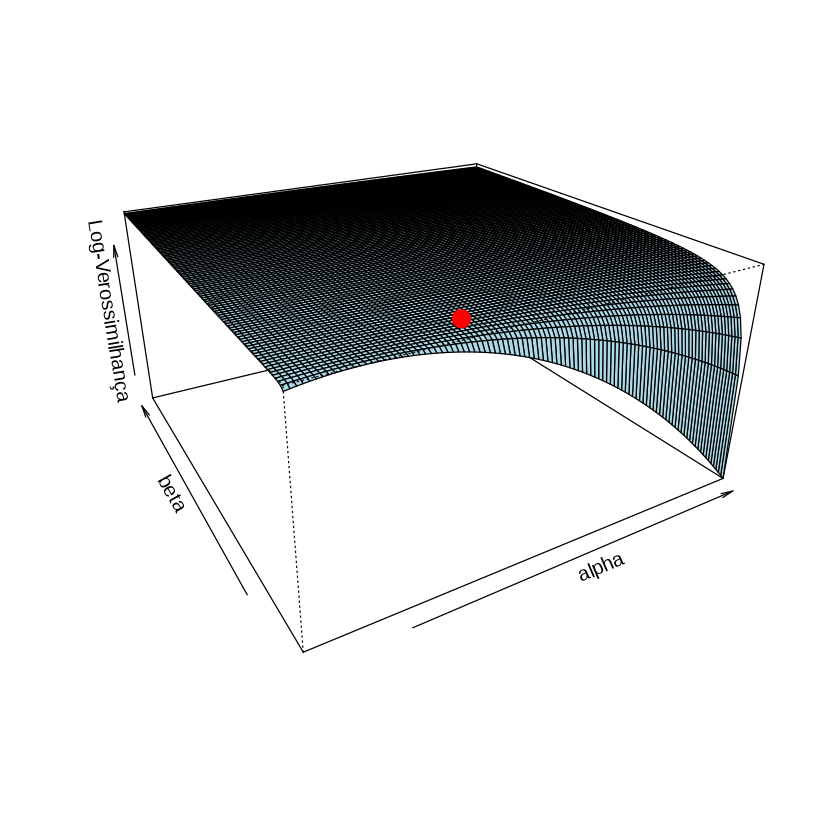

In [ ]:
### ESTIMATIVA OBTIDA

p = persp(alfa_grid, lambda_grid, logVerMatrix,
      theta = -30, phi = 25, expand = 0.5,
      col = "lightblue", xlab = "alpha", ylab = "beta", zlab = "Log-Verossimilhança")

pt3d <- trans3d(alfa_hat, lambda_hat, fverossimGamma(alpha_hat, lambda_hat, dados), p)

# Adiciona ponto vermelho
points(pt3d, col = "red", pch = 19, cex = 2.0)

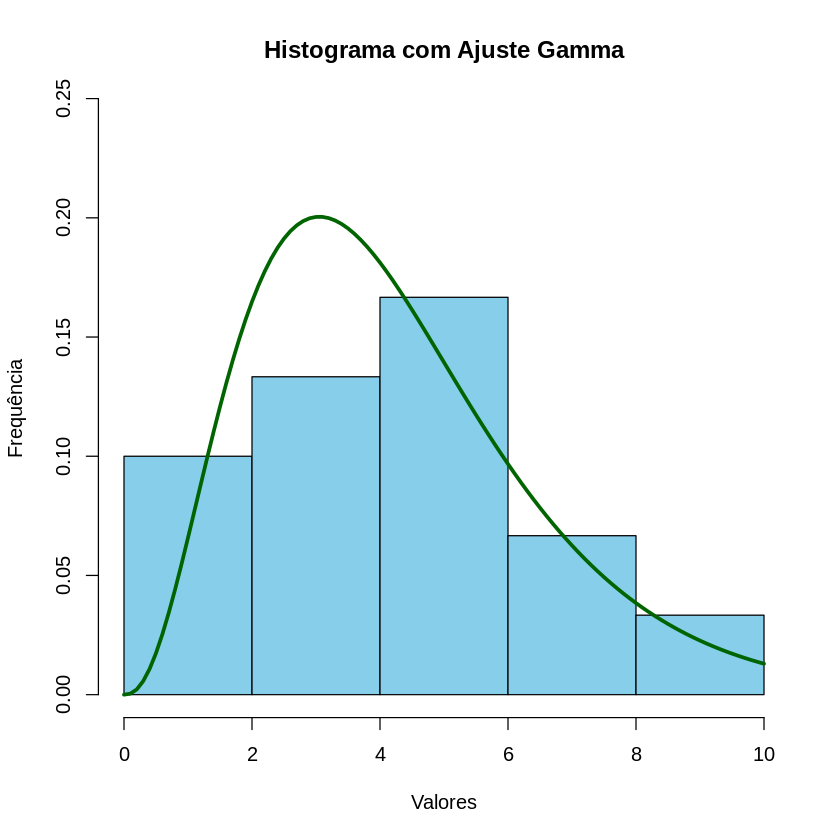

In [ ]:
hist(dados,
    freq = FALSE,
    col = "skyblue",
     border = "black",
     main = "Histograma com Ajuste Gamma",
     xlab = "Valores",
     ylab = "Frequência",
     ylim = c(0, max(dgamma(dados, shape = alpha_hat, rate = beta_hat)) * 1.2))

curve(dgamma(x, shape = alfa_hat, rate = lambda_hat), col = "darkgreen", lwd = 3, add = TRUE)

# Log-normal

In [ ]:
### Log-verossimilhança Log-Normal
fVerossimLognormal = function(mi, sigma2, dados){
  n = length(dados)
  -15*(log(((2*pi)**0.5)*sigma2)) - sum(log(dados)) - (1/(2*sigma2))*sum((log(dados) - mi)**2)
}

In [ ]:
# GERANDO OS PONTOS (MESHGRID) PARA PLOTAR O GRÁFICO 3D
mi_grid = seq(0.1, 10, 0.1)
sigma2_grid = seq(0.1, 10, 0.1)

for (i in seq_along(mi_grid)) {
  for (j in seq_along(sigma2_grid)) {
    logVerMatrix[i, j] <- fVerossimLognormal(mi_grid[i], sigma2_grid[j], dados)
  }
}

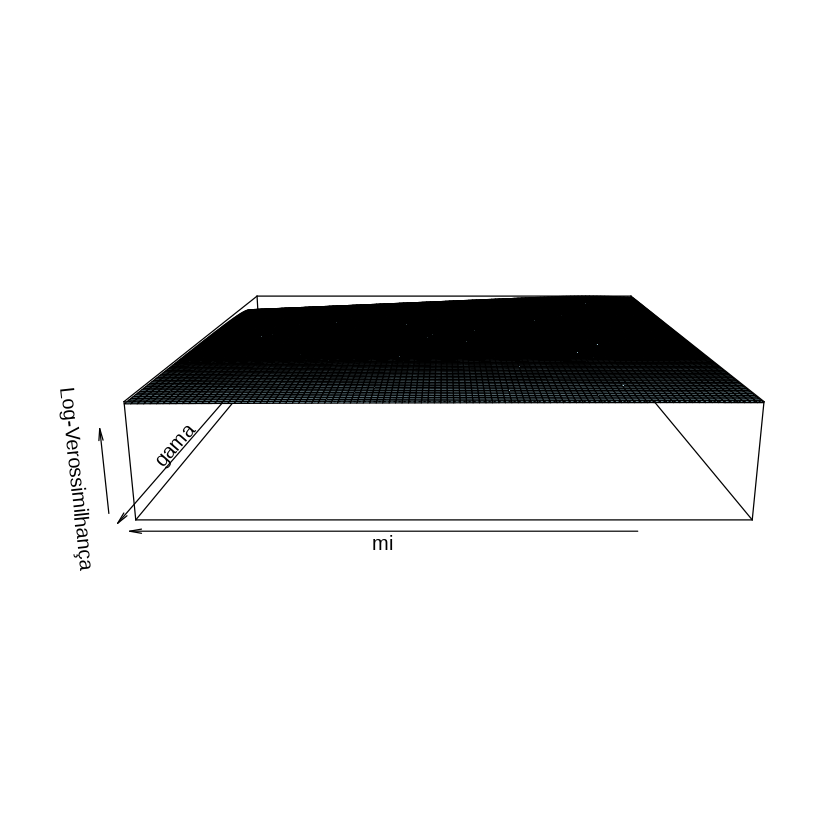

In [ ]:
#### GRÁFICO DA FUNÇÃO DE VEROSSIMILHANÇA
persp(mi_grid, sigma2_grid, logVerMatrix,
      theta = 180 , phi = 15, expand = 0.2,
      col = "lightblue", xlab = "mi", ylab = "gama", zlab = "Log-Verossimilhança")

In [ ]:
### Método da máxima verossimilhança
mi = sum(log(dados))/15
sigma2 = sum((log(dados) - mi)**2)/15

cat("Estimador mi:", mi, "\n")
cat("Estimador sigma2", sigma2)

Estimador mi: 1.301734 
Estimador sigma2 0.3220745

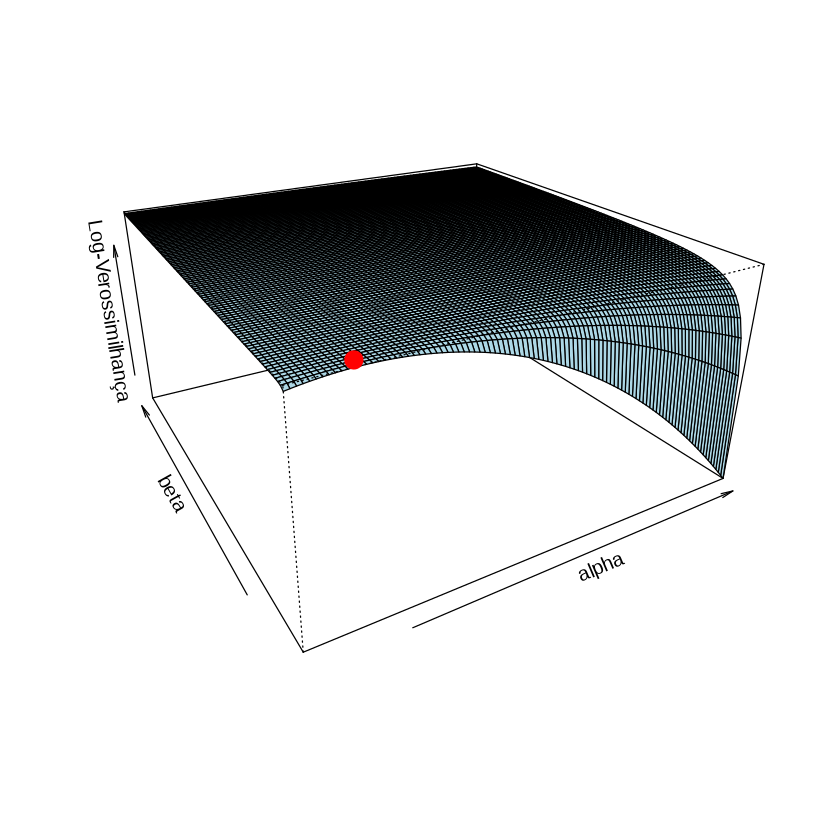

In [ ]:
p = persp(mi_grid, sigma2_grid, logVerMatrix,
      theta = -30, phi = 25, expand = 0.5,
      col = "lightblue", xlab = "alpha", ylab = "beta", zlab = "Log-Verossimilhança")

pt3d <- trans3d(mi, sigma2, fVerossimLognormal(mi, sigma2, dados), p)

# Adiciona ponto vermelho
points(pt3d, col = "red", pch = 19, cex = 2.0)

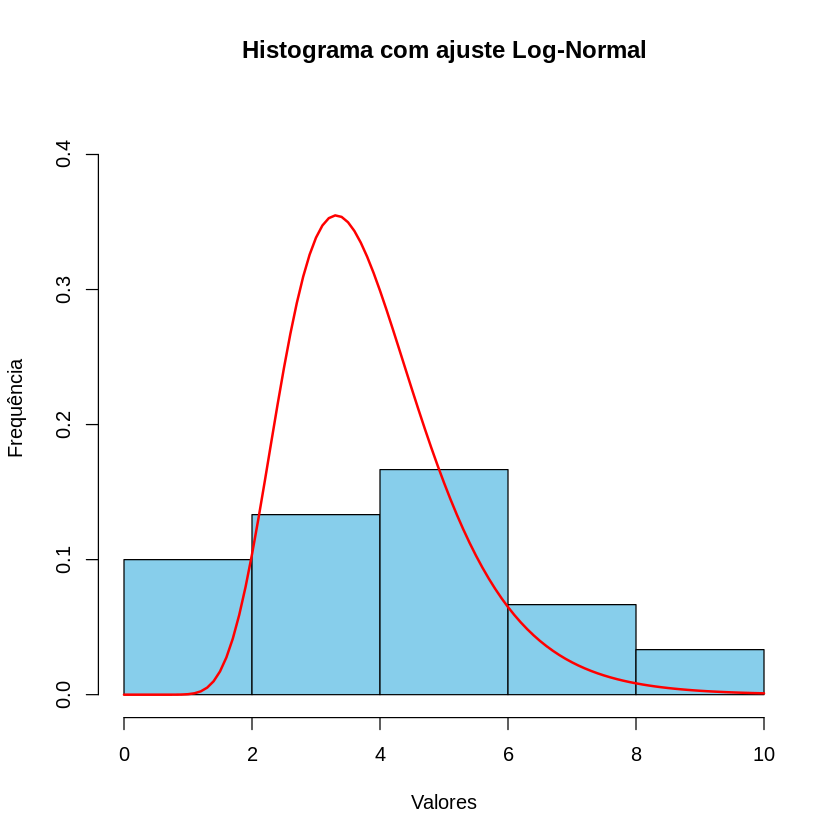

In [ ]:
# Plotar histograma com densidade
hist(dados,
    freq = FALSE,
    col = "skyblue",
    border = "black",
    main = "Histograma com ajuste Log-Normal",
    xlab = "Valores",
    ylab = "Frequência",
    ylim = c(0, max(dlnorm(dados, meanlog = mi, sdlog = sigma2)) * 1.2))

curve(dlnorm(x, meanlog = mi, sdlog = sigma2), from = 0, to = 10, col = "red", lwd = 2, add = TRUE)

# Comparação

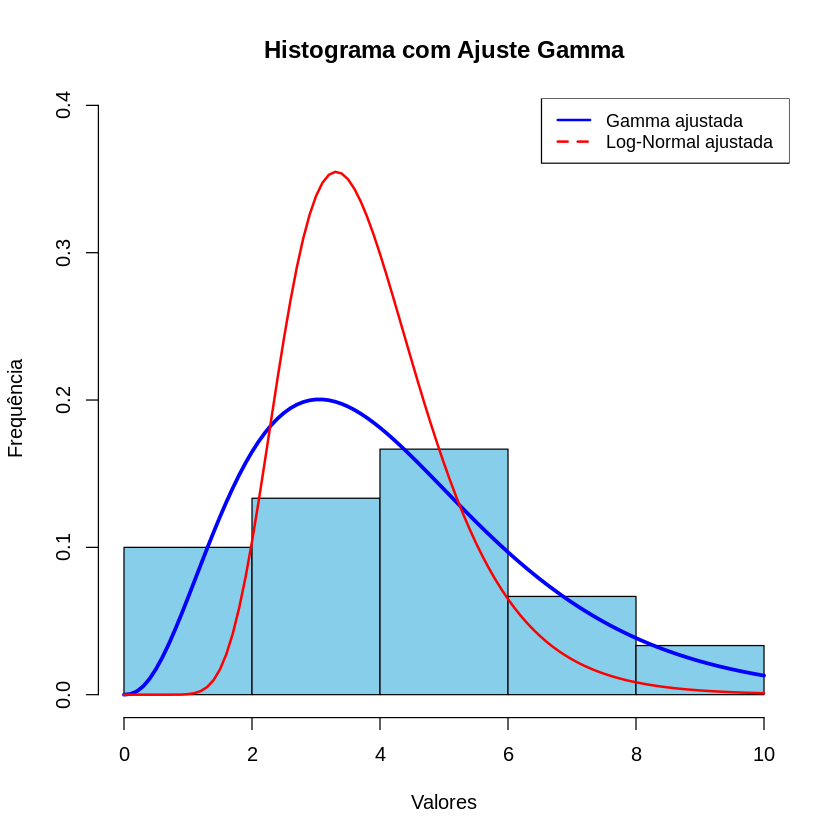

In [ ]:
hist(dados,
    freq = FALSE,
    col = "skyblue",
     border = "black",
     main = "Histograma com Ajuste Gamma",
     xlab = "Valores",
     ylab = "Frequência",
     ylim = c(0, max(dlnorm(dados, meanlog = mi, sdlog = sigma2)) * 1.1))

curve(dgamma(x, shape = alfa_hat, rate = lambda_hat), col = "blue", lwd = 3, add = TRUE)
curve(dlnorm(x, meanlog = mi, sdlog = sigma2), from = 0, to = 10, col = "red", lwd = 2, add = TRUE)

legend("topright",                                # posição
       legend = c("Gamma ajustada", "Log-Normal ajustada"),  # textos
       col = c("blue", "red"),                    # cores das linhas
       lty = c(1, 2),                              # tipo de linha (contínua, tracejada)
       lwd = 2,                                    # espessura da linha
       bg = "white",                               # fundo da legenda
       box.lwd = 1,                                # contorno da caixa
       cex = 0.9)

In [ ]:
## Médias
cat("Esperança da gamma:", alfa_hat/lambda_hat, "\n")
cat("Esperança da log-normal", exp(1)**(mi + 0.5*sigma2))

Esperança da gamma: 4.266667 
Esperança da log-normal 4.317909

In [ ]:
### Probabilidade do custo ser maior que 9 mil

1 - pgamma(9, alfa_hat, lambda_hat)

[1] 0.03892799